<a href="https://colab.research.google.com/github/lrizzi1/mlbackpropagation/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

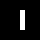

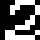

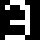

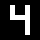

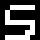

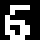

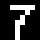

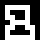

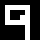

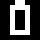

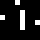

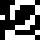

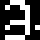

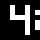

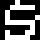

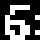

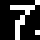

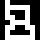

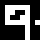

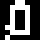

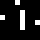

[1]


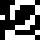

[2]


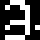

[3]


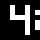

[4]


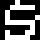

[5]


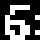

[6]


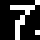

[7]


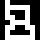

[8]


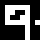

[9]


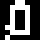

[0]


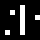

[1]


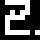

[2]


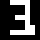

[3]


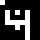

[4]


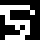

[5]


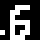

[6]


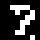

[7]


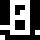

[8]


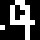

[9]


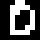

[0]


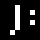

[1]


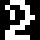

[2]


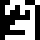

[3]


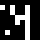

[4]


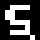

[5]


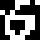

[6]


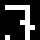

[7]


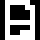

[8]


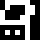

[9]


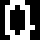

[0]
acertividade = 1.0


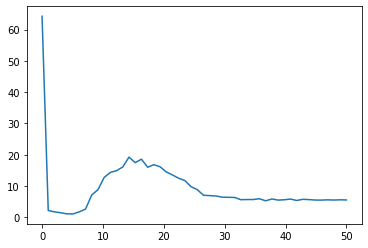

In [ ]:
import numpy as np
import pandas as pd 
from PIL import Image
import time
import math
import matplotlib.pyplot as plt

x_erro_epocas = np.linspace(0,50, 50)
y_erro_epocas = np.zeros(50)


#coloquei os dados no github assim o colab pode importar por essa biblioteca bem doida que eu achei
uri='https://raw.githubusercontent.com/lrizzi1/mlbackpropagation/main/data%20(2).csv?token=AQJB7WD4E2Z64W7ZOTUDE33BDVPOC'

dados = pd.read_csv(uri)

#como eu nao sou experiente na biblioteca que achei tratei logo de tirar os dados dela e jogar pro numpy
matriz = dados.values
y = matriz[:,0]# y eh o vetor de saida
x = matriz[:,1:]# x eh uma matriz de entrada de 210 entradas por 64

#esta eh uma funcao que eu fiz para graficamente mostrar o numero gerado, para vizualizacao
#nao comentarei mais pois nao eh relevante pro estudo em questao e eu pouco entendo como fiz isso funcionar XD
def print_num (num):
  img = Image.new('1', [8 , 8], color=1)
  pixels = img.load()
  for i in range(img.size[0]):
      for j in range(img.size[1]):
          pixels[j,i] = int(x[num,i*8+j])
  img = img.resize([40 , 40])
  display(img)

np.random.seed(int(time.time()))
for i in range (0, 10 ):
  print_num(i+180)

#aqui vou inserir um erro em ate tres locais da imagem do numero
#eh em ate tres pois vou "settar" bits aleatorios , mas eles podem ja estar "settados" portanto nao fazendo nada
#havendo a possibilidade que nao haja erro
for i in range (0 , np.size(x,0)):
  x[i,np.random.randint(0,63)] = 1
  x[i,np.random.randint(0,63)] = 1
  x[i,np.random.randint(0,63)] = 1
  #print_num(1)
  #print('\n')
  #uncomment in order to see the numbers used as input

for i in range (0, 10 ):
  print_num(i+180)

class perceptron:#copia modificada do antigo perceptron
    def __init__(self , input_size , tx_correao):
      #retirado o np.random.seed(int(time.time())) para criar a seed so uma vez assim gerando numeros aleatorios
      self.pesos = np.random.rand(input_size+1)* 2 - 1
      self.tx = tx_correao
      self.size_input = input_size

    def classificar (self , input):
      valor = sum(input*self.pesos[1:])+self.pesos[0]# aplica os pesos as entradas 
      valor = 1/(1+math.exp(-(valor))) # funcao sigmoide aplicada , aquela com exponencial pq parecia mais facil dps no backpropagation no Haykin
      return valor


class rede_neural: 
  def __init__(self , num_camadas , perceptrons_por_camada , input_size , taxa_aprendizado ):
    #como nao consegui criar uma matriz com apenas o tamanho nescessario para armazenar os perceptrons crio uma matriz gigante
    # e controlo por meio dos parametros acima oq deve ser computado dela , assim eu gasto memoria mas economizo computacao
    self._num_camadas = num_camadas
    self._perceptrons_por_camada = perceptrons_por_camada
    self._taxa_aprendizado = taxa_aprendizado

    # ai a matriz gigante ...
    #basicamente eu considerei que a primeira camada de perceptrons eh a maior portanto a implementacao falha
    # se alguem tentar usar com uma camada escondida ou final maior que a primeira XD                            <===== nota importante de implementacao
    self.perceptrons = np.zeros([num_camadas,perceptrons_por_camada[0]],dtype=perceptron)
    self.outputs=np.zeros([self._num_camadas,self._perceptrons_por_camada[0]],dtype=float)
    
    # a seguir guardo os perceptrons em uma matriz , note que os primeiros (i==0) tem o tamanho do vetor de pesos igual ao
    # tamanho do vetor de entrada enquanto os outros tem o vetor de pesos igual ao temanho da camada anterior 
    # ou seja nesta implementacao ta todo mundo ligado
    for i in range (0,num_camadas):
      for j in range (0 , perceptrons_por_camada[i]):
        if(i == 0):
          self.perceptrons[i][j]= perceptron(input_size,0.3)
        else:
          self.perceptrons[i][j]= perceptron(perceptrons_por_camada[i-1],0.3)
    
  def classificar (self , input):
    for i in range (0,self._num_camadas):
      for j in range (0 , self._perceptrons_por_camada[i]):
        if(i == 0):
          self.outputs[i][j]= self.perceptrons[i][j].classificar(input)
        else:
          self.outputs[i][j]= self.perceptrons[i][j].classificar(self.outputs[i-1][0:self._perceptrons_por_camada[i-1]])
    return self.outputs[-1][0:self._perceptrons_por_camada[-1]]

  #beleza agora ja fiz a foward , falta so a back

  #essa funcao deve reeber um conjunto de dados e realizar o treinamento uma vez , assim outra funcao
  # vai chama-la varias vezes , misturando os dados para melhor resultados e criar varias epocas
  def treina_epoca ( self , matriz_entrada , y_error , indice_y):
    y = matriz_entrada[0]
    x = matriz_entrada[1:]
    self.deltas_saidas = np.zeros([self._num_camadas,self._perceptrons_por_camada[0]],dtype=float)#2
    self.saidas = np.zeros([self._num_camadas,self._perceptrons_por_camada[0]],dtype=float)#1

    
    aux = np.zeros(self._perceptrons_por_camada[-1],dtype=float)
    aux[y] = 1
    aux2 = self.classificar(x[:])
    self.saidas = self.outputs
    y_error[indice_y] += np.sum(aux-aux2)**2# AQUI EH ESTIMADO O ERRO POR EPOCA = (saida desejada - obtida )**2
    self.deltas_saidas[-1][0:self._perceptrons_por_camada[-1]] = (aux - aux2) * aux2 * (1 - aux2)# erro * derivadasigmoide
    #print(aux - aux2 , self.deltas_saidas[-1])

    for i in range(self._num_camadas-1 , 0 , -1):
      for k in range (0 , self._perceptrons_por_camada[i-1]):
        for h in range (0 , self._perceptrons_por_camada[i]):
          self.deltas_saidas[i-1][k] = self.deltas_saidas[i-1][k] + self.deltas_saidas[i][h] * self.perceptrons[i][h].pesos[k+1] * self.saidas[i-1][k] * (1-self.saidas[i-1][k])

    #ajuste dos pesos da primeira camada
    for j in range (0 , self._perceptrons_por_camada[0]):
      for k in range (0 , x.size):
        #for z in range (0 , x.size):
        if(k==0):#k=0 indica o ajuste dos pesos w0 que nao sao multiplicados por nenhuma entrada, são apenas somados no calculo da saida
          self.perceptrons[0][j].pesos[0] = self.perceptrons[0][j].pesos[0] + self.deltas_saidas[0][j] * self._taxa_aprendizado
        else:
          self.perceptrons[0][j].pesos[k] = self.perceptrons[0][j].pesos[k] + self.deltas_saidas[0][j] * x[k-1] * self._taxa_aprendizado

    for i in range(1 , self._num_camadas):
      for j in range (0 , self._perceptrons_por_camada[i]):
        for k in range (0 , self._perceptrons_por_camada[i-1]):
          #for z in range (0 , self._perceptrons_por_camada[i-1]):
          if(k==0):
            self.perceptrons[i][j].pesos[k] = self.perceptrons[i][j].pesos[k] + self.deltas_saidas[i][j]  * self._taxa_aprendizado
          else:
            self.perceptrons[i][j].pesos[k] = self.perceptrons[i][j].pesos[k] + self.deltas_saidas[i][j] * self.saidas[i-1][k-1] * self._taxa_aprendizado


#implementacao do treino com muitas epocas, falta implementar na classe pra ficar bonitim
matriz_copia = matriz.copy()
R = rede_neural(5 , [64,46,32,21,10],64 , 0.3)
#print(R.classificar(x[0]))
for j in range (0 , 50):# numero de epocas
  for i in range (0 , 180):# ate onde usa do dataset para treinar
    R.treina_epoca(matriz_copia[i][:].copy(),y_erro_epocas,j)
  if (j>25):
    R._taxa_aprendizado = R._taxa_aprendizado * 0.8
  np.random.shuffle(matriz_copia)

plt.plot(x_erro_epocas , y_erro_epocas)
corretos = 0
for i in range (0 , 30):# complemento do dataset para avaliar
  aux = R.classificar(x[i+180])
  result = np.where(aux == np.amax(aux))
  print_num(i+180)
  print(result[0])
  if(result[0] == y [i+180]):
    corretos+=1
print("acertividade =" , corretos / 30 )

